In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
races_data = pd.read_csv('./data_files/races.csv')
pit_stop_data = pd.read_csv('./data_files/pit_stops.csv')
drivers = pd.read_csv('./data_files/drivers.csv')
lap_times = pd.read_csv('./data_files/lap_times.csv')

### 2021 Abu Dhabi Race

In [3]:
lap_times = lap_times[lap_times['raceId'] == 1073]
lap_times

,raceId,driverId,lap,position,time,milliseconds
513594,1073,1,1,1,1:31.686,91686
513595,1073,1,2,1,1:28.791,88791
513596,1073,1,3,1,1:28.587,88587
513597,1073,1,4,1,1:28.789,88789
513598,1073,1,5,1,1:28.630,88630
...,...,...,...,...,...,...
514587,1073,847,22,15,1:30.821,90821
514588,1073,847,23,15,1:30.647,90647
514589,1073,847,24,14,1:31.577,91577
514590,1073,847,25,16,1:32.794,92794


Drivers that were in the 2021 Abu Dhabi Race

In [4]:
drivers = drivers[drivers['driverId'].isin(lap_times['driverId'])]
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
19,20,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
452,842,gasly,10,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly


In [5]:
drivers.drop(columns=['url','dob','nationality','forename','driverRef'], inplace=True)
drivers

,driverId,number,code,surname
0,1,44,HAM,Hamilton
3,4,14,ALO,Alonso
7,8,7,RAI,Räikkönen
19,20,5,VET,Vettel
452,842,10,GAS,Gasly
814,815,11,PER,Pérez
816,817,3,RIC,Ricciardo
821,822,77,BOT,Bottas
829,830,33,VER,Verstappen
831,832,55,SAI,Sainz


In [6]:
drivers = drivers.set_index('driverId')
drivers_dict = drivers.to_dict('dict')
drivers_dict['surname']

{1: 'Hamilton',
 4: 'Alonso',
 8: 'Räikkönen',
 20: 'Vettel',
 842: 'Gasly',
 815: 'Pérez',
 817: 'Ricciardo',
 822: 'Bottas',
 830: 'Verstappen',
 832: 'Sainz',
 839: 'Ocon',
 840: 'Stroll',
 841: 'Giovinazzi',
 844: 'Leclerc',
 846: 'Norris',
 847: 'Russell',
 849: 'Latifi',
 852: 'Tsunoda',
 854: 'Schumacher'}

In [7]:
driver_names = lap_times['driverId'].replace(drivers_dict['surname'])
driver_names

513594    Hamilton
513595    Hamilton
513596    Hamilton
513597    Hamilton
513598    Hamilton
            ...   
514587     Russell
514588     Russell
514589     Russell
514590     Russell
514591     Russell
Name: driverId, Length: 998, dtype: object

In [8]:
lap_times['name'] = driver_names

In [9]:
lap_times

,raceId,driverId,lap,position,time,milliseconds,name
513594,1073,1,1,1,1:31.686,91686,Hamilton
513595,1073,1,2,1,1:28.791,88791,Hamilton
513596,1073,1,3,1,1:28.587,88587,Hamilton
513597,1073,1,4,1,1:28.789,88789,Hamilton
513598,1073,1,5,1,1:28.630,88630,Hamilton
...,...,...,...,...,...,...,...
514587,1073,847,22,15,1:30.821,90821,Russell
514588,1073,847,23,15,1:30.647,90647,Russell
514589,1073,847,24,14,1:31.577,91577,Russell
514590,1073,847,25,16,1:32.794,92794,Russell


In [10]:
teams_dict = {
    'Hamilton' : 'Mercedes',
    'Bottas' : 'Mercedes',
    'Alonso' : 'Apline',
    'Ocon' : 'Apline',
    'Ricciardo': 'McLaren',
    'Norris': 'McLaren',
    'Pérez' : 'RedBull',
    'Verstappen': 'RedBull',
    'Tsunoda': 'Alpha Tauri',
    'Gasly' :'Alpha Tauri',
    'Leclerc' : 'Farrari',
    'Sainz' : 'Farrari',
    'Räikkönen' : 'Alpha Romero',
    'Giovinazzi': 'Alpha Romero',
    'Vettel': 'Aston Martin',
    'Stroll': 'Aston Martin',
    'Russell': 'Williams',
    'Latifi' : 'Williams',
    'Schumacher' : 'Haas'
}

In [89]:
team_names= lap_times['name'].replace(teams_dict)
lap_times['team'] = team_names
lap_times = lap_times.sort_values(by=['team'])

In [90]:
lap_times['name'].unique()

array(['Räikkönen', 'Giovinazzi', 'Tsunoda', 'Gasly', 'Ocon', 'Alonso',
       'Vettel', 'Stroll', 'Leclerc', 'Sainz', 'Schumacher', 'Ricciardo',
       'Norris', 'Hamilton', 'Bottas', 'Verstappen', 'Pérez', 'Russell',
       'Latifi'], dtype=object)

C:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


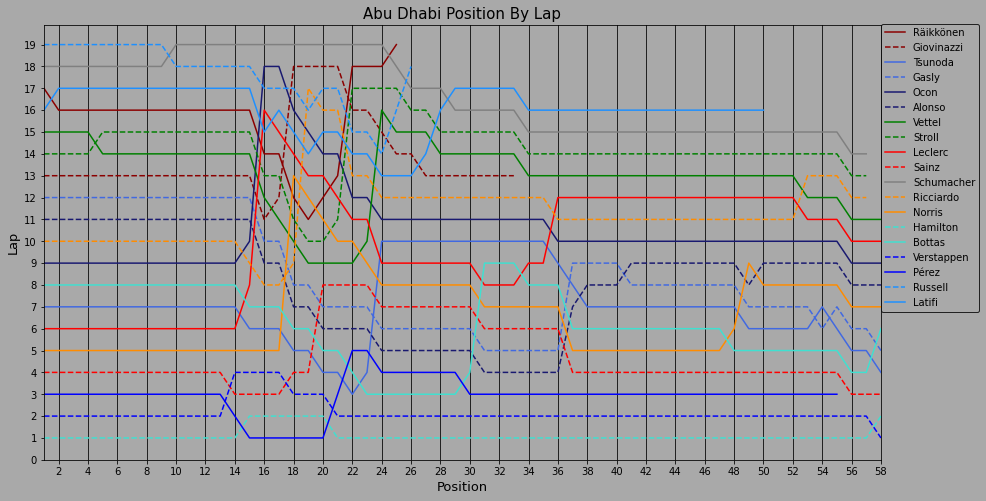

In [102]:
team_colors = ['DarkRed','DarkRed','royalBlue', 'royalBlue','midnightblue', 'midnightblue','Green','Green',
'Red', 'Red', 'grey', 'darkorange','darkorange','Turquoise','Turquoise','Blue', 'Blue','dodgerblue', 'dodgerblue']
fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(lap_times['lap'], lap_times['position'],hue=lap_times['name'], palette=team_colors)
plt.yticks(np.arange(0,20,step=1))
plt.xticks(np.arange(0,60,step=2))
plt.xlim(1,58)
plt.grid(axis='x')

for x in range(len(ax.lines)):
    if x % 2 ==0:
        ax.lines[x].set_linestyle('-')
    else:
        ax.lines[x].set_linestyle('--')

plt.title('Abu Dhabi Position By Lap', fontsize=15)
plt.xlabel('Position', fontsize=13)
plt.ylabel('Lap', fontsize=13)
ax.set_facecolor('darkgray')
fig.set_facecolor('darkgray')
plt.grid(axis='x',color='black')

ax.legend(labels= ['Räikkönen','Giovinazzi','Tsunoda','Gasly','Ocon','Alonso','Vettel','Stroll', 'Leclerc','Sainz','Schumacher',
'Ricciardo','Norris','Hamilton','Bottas', 'Verstappen','Pérez','Russell','Latifi'],
loc=(1,.34), facecolor='darkgrey', edgecolor='black')
plt.show()
